In [8]:
import sys
import os
from kanren import Relation, facts, run, conde, var, eq

print("projekt z si czy coś")

symptom = Relation()
ryzyko = Relation()
abc=555

projekt z si czy coś


In [9]:
facts(symptom,('Powiklania sercowe', 'dusznosc'),
     ('Powiklania sercowe', 'bol w klatce piersiowej'),
     ('Powiklania sercowe', 'tachykardia'),
     ('Powiklania sercowe', 'oslabienie'),
     ('Angioplastyka naczyn wiencowych', 'zawal serca'),
     ('Angioplastyka naczyn wiencowych', 'udar mozgu'),
     ('Angioplastyka naczyn wiencowych', 'zaburzenia rytmu serca'),
     ('Angioplastyka naczyn wiencowych', 'pekniecie sciany naczynia'),
     ('Angioplastyka naczyn wiencowych', 'zgon'),
     ('Zoltaczka noworodkowa wczesniaka', 'zolta barwa skory'),
     ('Zoltaczka noworodkowa wczesniaka', 'zolta barwa oczu'),
     ('Ostra niewydolnosc nerek', 'wymioty'),
     ('Ostra niewydolnosc nerek', 'biegunka'),
     ('Ostra niewydolnosc nerek', 'odwodnienie'),
     ('Ostra niewydolnosc nerek', 'krwotok'),
     ('Ostra niewydolnosc nerek', 'niewydolnosc serca'),
     ('Hipernatremia', 'nudnosci'),
     ('Hipernatremia', 'oslabienie'),
     ('Hipernatremia', 'bol glowy'),
     ('Hipernatremia', 'zaburzenia swiadomosci'),
     ('Hipernatremia', 'drgawki'),
     ('Hipernatremia', 'spiaczka'),
     ('Zapasc plucna', 'dusznosc'),
     ('Zapasc plucna', 'plytki i szybki oddech'),
     ('Zapasc plucna', 'tachykardia'),
     ('Zapasc plucna', 'krwioplucie'),
     ('Zapasc plucna', 'bol w klatce piersiowej'),
     ('Choroby jatrogenne', 'pogorszenie stanu zdrowia'),
     ('Choroby jatrogenne', 'wydluzenie czasu leczenia'),
     ('Choroby jatrogenne', 'zgon'), 
     ('Obrzezanie', 'brak napletka'))
     




In [10]:
facts(ryzyko, ('Powiklania sercowe', 'infekcja'),
      ('Angioplastyka naczyn wiencowych', 'zawal serca'),
      ('Angioplastyka naczyn wiencowych', 'niestabilna choroba wiencowa'),
      ('Angioplastyka naczyn wiencowych', 'stabilna choroba niedokrwienna'),
      ('Angioplastyka naczyn wiencowych', 'cukrzyca'),
      ('Angioplastyka naczyn wiencowych', 'niewydolnosc nerek'),
      ('Zoltaczka noworodkowa wczesniaka', 'wysoki poziom wolnej bilirubiny'),
      ('Zoltaczka noworodkowa wczesniaka', 'przedwczesne narodziny'),
      ('Ostra niewydolnosc nerek', 'zmniejszenie przeplywu krwi przez nerki'),
      ('Ostra niewydolnosc nerek', 'czynniki toksyczne'),
      ('Ostra niewydolnosc nerek', 'krwotok'),
      ('Ostra niewydolnosc nerek', 'odwodnienie'),
      ('Ostra niewydolnosc nerek', 'biegunka'),
      ('Ostra niewydolnosc nerek', 'spadek cisnienia krwi'),
      ('Ostra niewydolnosc nerek', 'niewydolnosc serca'),
      ('Ostra niewydolnosc nerek', 'uszkodzenie miesni'),
      ('Hipernatremia', 'niski poziom sodu'),
      ('Zapasc plucna', 'zakrzepica zylna'),
      ('Zapasc plucna', 'dlugotrwale unieruchomienie'),
      ('Zapasc plucna', 'choroby serca'),
      ('Zapasc plucna', 'trombofilia'),
      ('Zapasc plucna', 'palenie papierosow'),
      ('Zapasc plucna', 'zlamanie kosci'),
      ('Choroby jatrogenne', 'niewlasciwa postawa wobec chorego przez lekarza'),
      ('Choroby jatrogenne', 'niewlasciwie wykonane badanie'),
      ('Choroby jatrogenne', 'blad lekarza'),
      ('Obrzezanie', 'rodzice bedacy Zydami lub wyznawcami islamu'))


In [11]:
question = var()
#type(question)

In [12]:
print("Symptomy dla danej choroby: ")
print((run(0, question, symptom('Zapasc plucna', question))))

Symptomy dla danej choroby: 
('dusznosc', 'tachykardia', 'plytki i szybki oddech', 'bol w klatce piersiowej', 'krwioplucie')


In [13]:
print("Czynniki ryzyka dla danej choroby: ")
print((run(0, question, ryzyko('Zapasc plucna', question))))

Czynniki ryzyka dla danej choroby: 
('zlamanie kosci', 'choroby serca', 'zakrzepica zylna', 'dlugotrwale unieruchomienie', 'trombofilia', 'palenie papierosow')


In [14]:
def parent(prnt, child):
    return conde([symptom(prnt, child)], [ryzyko(prnt, child)])

In [15]:
print("Choroba dla danych symptomow: ")
print((run(0, question, parent(question, 'krwotok'), parent(question, 'biegunka') )))


Choroba dla danych symptomow: 
('Ostra niewydolnosc nerek',)


In [16]:
print("Symptomy i czynniki ryzyka dla danej choroby: ")
print((run(0, question, parent('Angioplastyka naczyn wiencowych', question))))

Symptomy i czynniki ryzyka dla danej choroby: 
('udar mozgu', 'niestabilna choroba wiencowa', 'zaburzenia rytmu serca', 'cukrzyca', 'zgon', 'zawal serca', 'stabilna choroba niedokrwienna', 'pekniecie sciany naczynia', 'niewydolnosc nerek')


In [17]:
print("Choroba dla danych czynnikow ryzyka: ")
print((run(0, question, parent(question, 'palenie papierosow'))))

Choroba dla danych czynnikow ryzyka: 
('Zapasc plucna',)


In [18]:
#ZADANIE NR 2

In [19]:
from sklearn import tree

In [20]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

cechy = [
    [1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
    ]

In [21]:
choroba = [ 'Powiklania sercowe', 'Angioplastyka naczyn wiencowych', 'Zoltaczka noworodkowa wczesniaka', 'Ostra niewydolnosc nerek', 'Hipernatremia', 'Zapasc plucna', 'Choroby jatrogenne', 'Obrzezanie']
print("Jest okej")

Jest okej


In [22]:
clf = tree.DecisionTreeClassifier()

In [23]:
clf = clf.fit(cechy, choroba)
#coś tam robi/ patterns in data i takie tam

In [24]:
output = clf.predict([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0]])
print(output)

['Zapasc plucna']


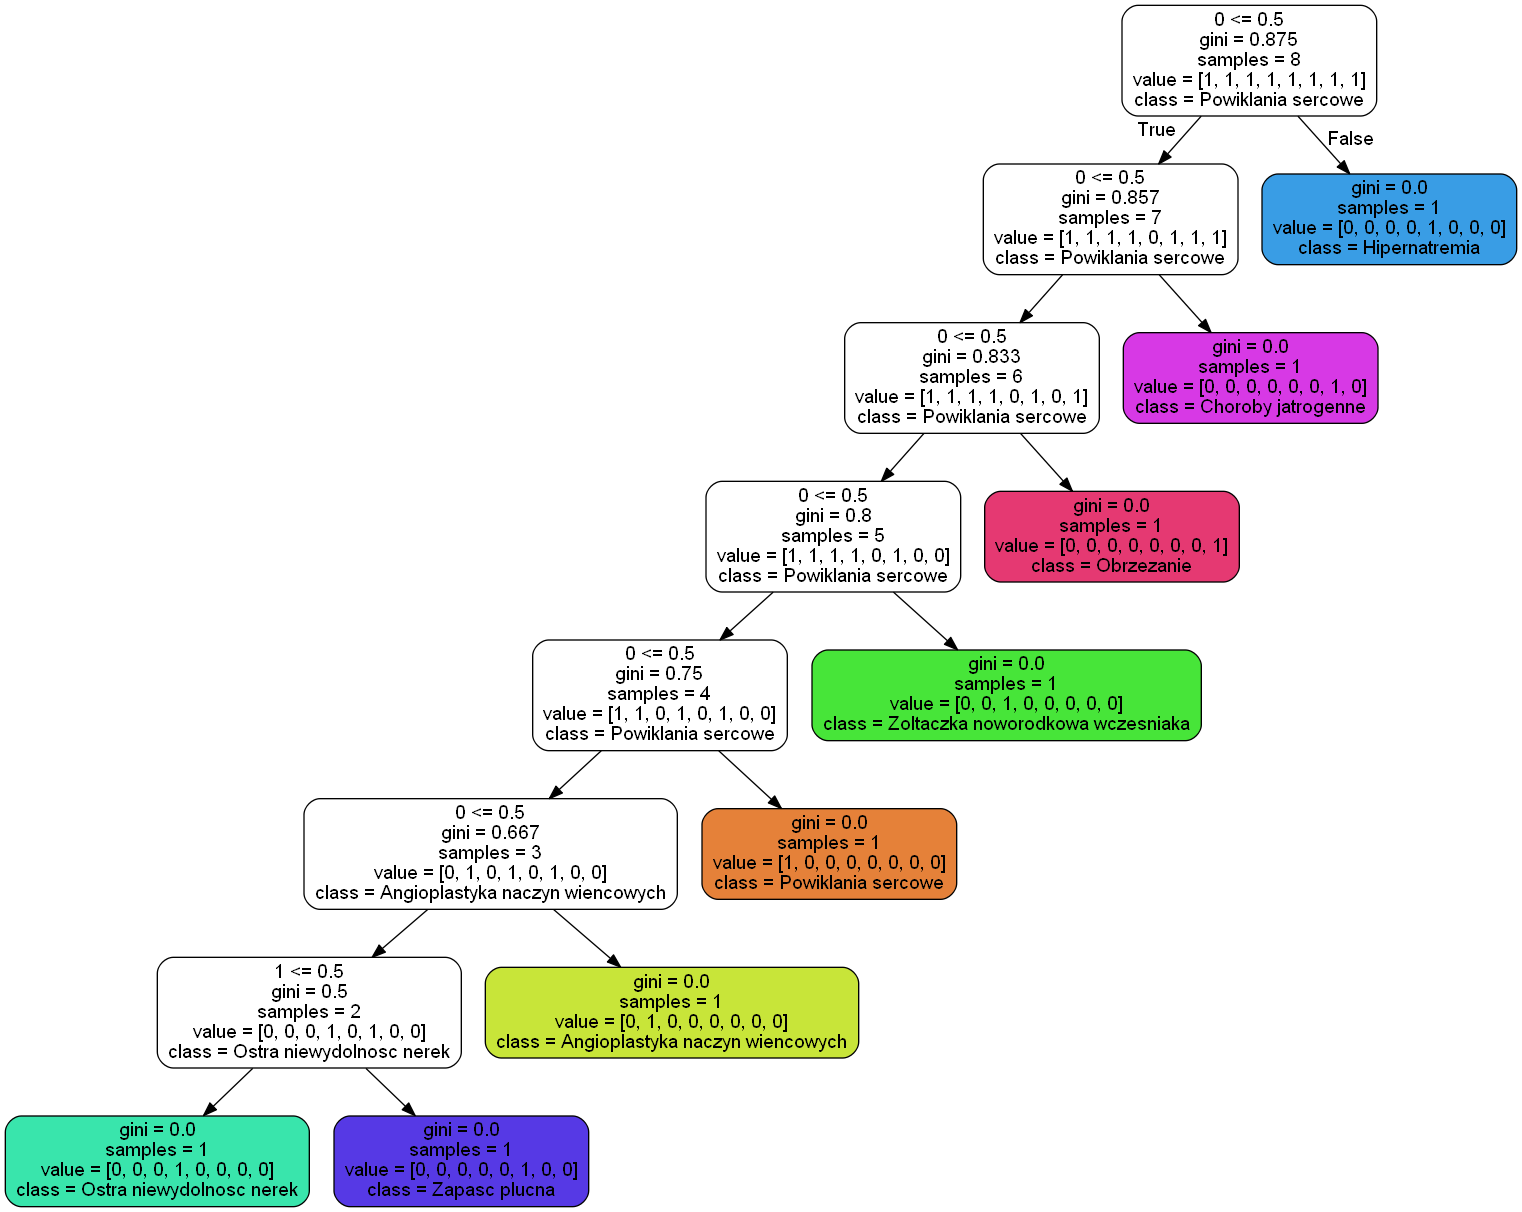

In [25]:
from sklearn.externals.six import StringIO
import pydotplus
from IPython.display import Image
dot_data = StringIO()
tree.export_graphviz(
    decision_tree=clf,
    out_file=dot_data,
    feature_names=cechy[0],
    class_names=choroba,
    filled=True,
    rounded=True,
    impurity=True
)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())